# Importação de recursos

In [1]:
#!pip install tensorflow==2.8.0

In [2]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
tf.__version__

'2.8.0'

In [3]:
from tensorflow.keras.models import load_model # função de carregamento de modelos já treinados
from tensorflow.keras.preprocessing.image import img_to_array # função de conversão de imagem para array

# Carregamento da imagem a ser detectada a emoção

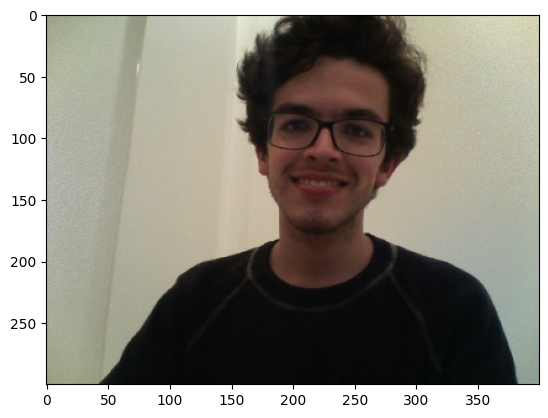

In [4]:
import matplotlib.pyplot as plt
img = cv2.imread('/kaggle/input/arquivos-card-20/Material/testes/teste_gabriel.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converte de BGR (padrão do opencv) para RGB (padrão do matplotlib)
plt.imshow(img)

# Importação de modelos treinados

Um modelo para a detecção da face na imagem e outro para a detecção da emoção na face.

## Importação do modelo para a detecção de faces

In [5]:
cascade_faces = '/kaggle/input/arquivos-card-20/Material/haarcascade_frontalface_default.xml'
face_detection = cv2.CascadeClassifier(cascade_faces) # cria o objeto do modelo a partir do xml de um modelo pré-treinado

## Modelo para a detecção de emoção

In [6]:
model_path = '/kaggle/input/arquivos-card-20/Material/modelo_01_expressoes.h5'
classifier_emotion = load_model(model_path, compile = False) # cria o modelo tensorflow a partir do h5 salvo, a compilação não é feita pois o modelo salvo já foi compilado

In [7]:
emotions = ['Raiva', 'Nojo', 'Medo', 'Feliz', 'Triste', 'Surpreso', 'Neutro']

# Detecção da face

In [8]:
original = img.copy() # cria uma cópia da imagem original
# faz a detecção das faces na imagem com o modelo pré-treinado face_detection, dados os parâmetros da função detectMultiScale
faces = face_detection.detectMultiScale(original, scaleFactor = 1.1,
                                       minNeighbors = 3, minSize = (20,20))

In [9]:
faces

array([[163,  41, 124, 124]], dtype=int32)

In [10]:
img.shape

(300, 400, 3)

Isso indica que apeanas uma face foi detectada, numa seleção 124x124 que começa em height = 163 e width = 41.

# Extração da ROI (region of interest)

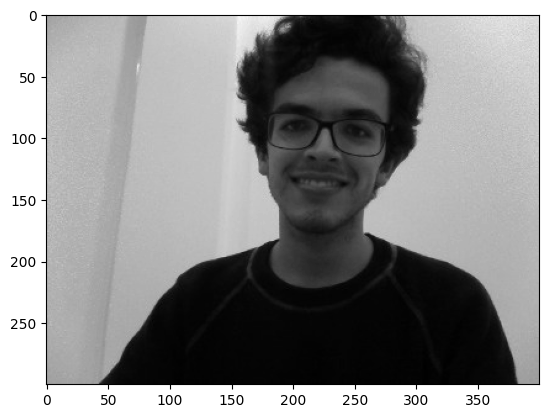

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

In [12]:
gray.shape

(300, 400)

Não se tem mais os 3 canais de cor.

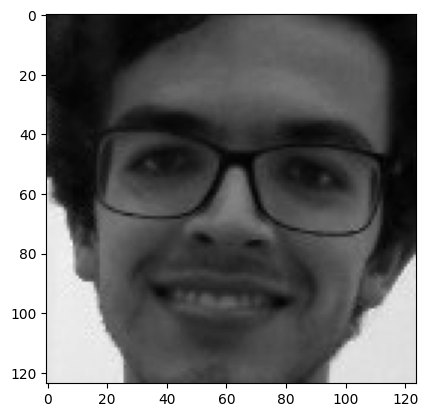

In [13]:
roi = gray[41:41+124, 163:163+124] # seleciona a região do rosto com base na seleção retornada pelo modelo face_detection
plt.imshow(roi, cmap='gray')

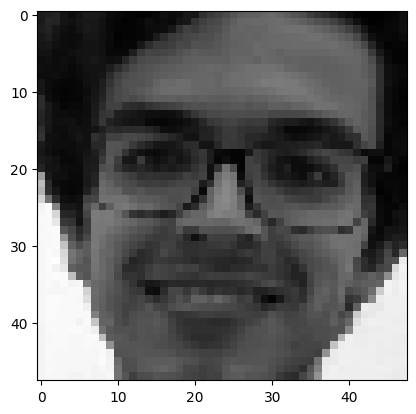

In [14]:
# reajustando a dimensionalidade da roi para a qual os modelos que serão usados foram treinados
roi = cv2.resize(roi, (48, 48))
plt.imshow(roi, cmap='gray')

In [15]:
roi.dtype

dtype('uint8')

In [16]:
# os modelos que serão usados utilizam floats normalizados entre 0 e 1
roi = roi.astype('float')/255.
roi

array([[0.11764706, 0.1254902 , 0.14117647, ..., 0.05098039, 0.05882353,
        0.07843137],
       [0.11372549, 0.14901961, 0.14117647, ..., 0.05882353, 0.0627451 ,
        0.07843137],
       [0.1254902 , 0.14117647, 0.10588235, ..., 0.0627451 , 0.0627451 ,
        0.08235294],
       ...,
       [0.73333333, 0.74117647, 0.74117647, ..., 0.71372549, 0.70980392,
        0.71372549],
       [0.72941176, 0.74509804, 0.74117647, ..., 0.71764706, 0.70980392,
        0.70980392],
       [0.72941176, 0.74117647, 0.74117647, ..., 0.70980392, 0.70196078,
        0.70588235]])

In [17]:
roi = img_to_array(roi) # converte a imagem para um array dimensionada para tensorflow, com o canal de cor (unitário, neste caso)
roi.shape

(48, 48, 1)

In [18]:
# agora, é adicionada a dimensão de batch
roi = np.expand_dims(roi, axis = 0)
roi.shape

(1, 48, 48, 1)

In [19]:
preds = classifier_emotion.predict(roi)[0] # a posição 0 se refere a primeira imagem, já que o array de roi tem uma dimensão de batch, ou seja, pode ter mais de uma imagem

In [20]:
preds

array([1.8371731e-05, 7.1217476e-09, 1.5533811e-05, 9.9161446e-01,
       2.2321910e-05, 2.9553908e-05, 8.2997680e-03], dtype=float32)

O maior valor é o do índice 3.

In [21]:
emotion_prob = np.max(preds)
emotion_prob

0.99161446

In [22]:
max_index = preds.argmax() # retorna o índice do maior elemento
emotions[max_index]

'Feliz'

Ou seja, o modelo tem 99% de certeza que a emoção presente na face da imagem dada é de felicidade.

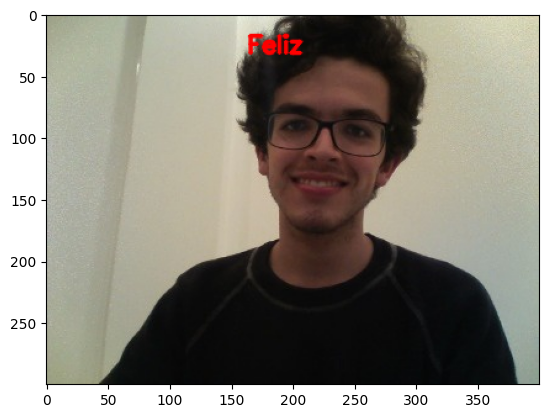

In [23]:
# adiciona o texto com label à face
cv2.putText(original, # imagem original a ser processada
            emotions[max_index], # label da emoção
            (163, 41 - 10), # onde por o texto na imagem
            cv2.FONT_HERSHEY_SIMPLEX, # tipo da fonte
            0.65, # tamanho da fonte
            (255, 0, 0), # cor da fonte
            2, # espessura da linha
            cv2.LINE_AA # tipo da linha
           )
plt.imshow(original)

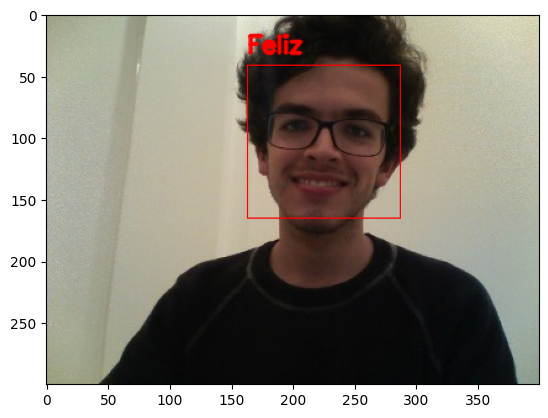

In [24]:
# adiciona o retângulo em volta da face
cv2.rectangle(original, 
              (163, 41), # ponto inicial do retângulo
             (163 + 124, 41 + 124), # ponto final do retângulo
             (255, 0, 0)) # cor do retângulo
plt.imshow(original)

# Testando outras imagens

In [25]:
import os
imgs_folder = '/kaggle/input/arquivos-card-20/Material/testes'
imgs = []
for i in os.listdir(imgs_folder):
    imgs.append(cv2.imread(imgs_folder + '/' + i))
    imgs[-1] = cv2.cvtColor(imgs[-1], cv2.COLOR_BGR2RGB)

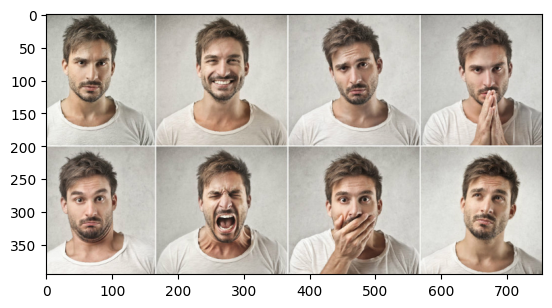

In [26]:
plt.imshow(imgs[2])

In [27]:
img_test = imgs[2].copy()
faces2 = face_detection.detectMultiScale(img_test, scaleFactor = 1.1,
                                       minNeighbors = 3, minSize = (20,20))

In [28]:
faces2

array([[226,  36,  87,  87],
       [625,  50,  89,  89],
       [ 21,  40,  94,  94],
       [419,  43,  98,  98],
       [228, 242,  86,  86],
       [421, 243,  95,  95],
       [ 19, 243,  97,  97],
       [628, 242,  88,  88]], dtype=int32)

0.9998503
0.7060293
0.406785
0.41038826
0.49903607
0.5894063
0.48449737
0.4711134


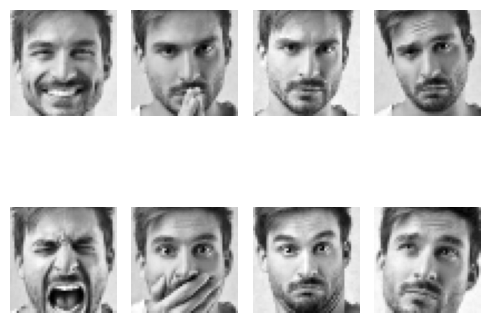

In [29]:
gray = cv2.cvtColor(img_test, cv2.COLOR_RGB2GRAY)
fig, axs = plt.subplots(2, 4, figsize=(5,5))
c = 0
for (x, y, w, h) in faces2: # (largura da img, altura da img, largura da face, altura da face)
    roi = gray[y:y+h, x:x+w] # extrai a região de interesse
    
    roi = cv2.resize(roi, (48,48)) # redimensiona a roi para o que o modelo pede
    
    # imprime as faces em subplots
    axs.flat[c].imshow(roi, cmap='gray')
    axs.flat[c].axis('off')
    c += 1
    
    roi = roi.astype('float')/255. # transforma em float e normaliza
    roi = img_to_array(roi) # transforma em array e adiciona a dimensão de cor
    roi = np.expand_dims(roi, axis = 0) # adiciona a dimensão de batch no primeiro eixo
    
    preds2 = classifier_emotion.predict(roi)[0] # faz a previsão
    
    emotion_prob = np.max(preds2) # pega a maior probabilidade
    print(emotion_prob)
    
    label = emotions[preds2.argmax()] # pega a label da maior probabilidade
    
    cv2.putText(img_test, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.65, 
               (255, 0, 0), 2, cv2.LINE_AA)
    cv2.rectangle(img_test, (x, y), (x+w, y+h), (255,0,0), 2)
    
plt.tight_layout()
plt.show()

In [30]:
preds

array([1.8371731e-05, 7.1217476e-09, 1.5533811e-05, 9.9161446e-01,
       2.2321910e-05, 2.9553908e-05, 8.2997680e-03], dtype=float32)

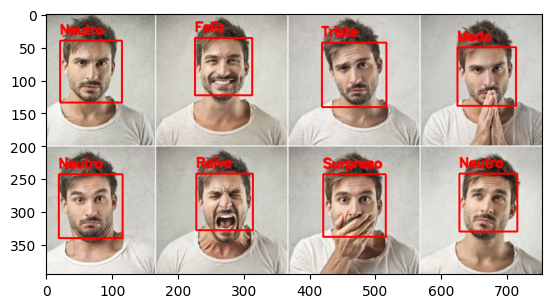

In [31]:
plt.imshow(img_test)

# Adicionando barras de probabilidade

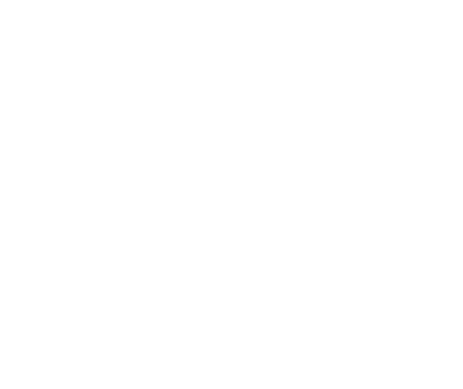

In [39]:
# criação da imagem em branco para suportar as barras posteriormente
probs = np.ones((250, 300, 3), dtype='uint8') * 255 
plt.axis('off')
plt.imshow(probs)

In [42]:
if len(faces) == 1: # só funciona para uma imagem de cada vez
    for (i, (emotion, prob)) in enumerate(zip(emotions, preds)): # itera por cada emoção, com index, label e probabilidade respectivos
        text = f'{emotion}: {(prob * 100):.2f}' # imprime a emoção com sua probabilidade em porcentagem
        w = int(prob*300) # largura da barra, com um máximo de 300 pixels
        cv2.rectangle(probs, (7, (i*35)+5), (w, (i*35)+35), (20, 250, 200), -1)
        cv2.putText(probs, text, (10, (i*35)+23), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 0), 1, cv2.LINE_AA)

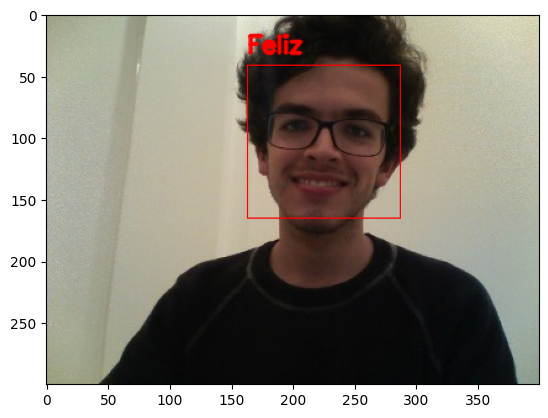

In [35]:
plt.imshow(original)

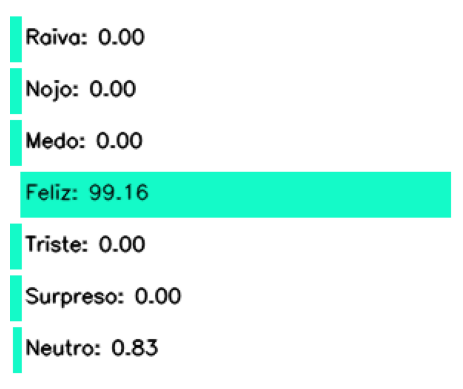

In [43]:
plt.axis('off')
plt.imshow(probs)